# Telecom Chrun case study

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

### Data Reading and understanding

In [2]:
# Reading telecom input data
telecom_df = pd.read_csv("telecom_churn_data.csv")
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
telecom_df.shape

(99999, 226)

In [4]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
telecom_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [6]:
# checking columns with missing values
telecom_df.isnull().sum().sort_values(ascending=False).head(50)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [7]:
# Percentage of null values in columns
round(telecom_df.isnull().sum()/len(telecom_df.index),2).sort_values(ascending=False)

arpu_3g_6                   0.75
av_rech_amt_data_6          0.75
date_of_last_rech_data_6    0.75
total_rech_data_6           0.75
max_rech_data_6             0.75
count_rech_2g_6             0.75
fb_user_6                   0.75
count_rech_3g_6             0.75
night_pck_user_6            0.75
arpu_2g_6                   0.75
night_pck_user_8            0.74
av_rech_amt_data_8          0.74
arpu_3g_9                   0.74
total_rech_data_9           0.74
night_pck_user_9            0.74
total_rech_data_8           0.74
total_rech_data_7           0.74
av_rech_amt_data_7          0.74
max_rech_data_8             0.74
date_of_last_rech_data_9    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_7    0.74
night_pck_user_7            0.74
arpu_3g_7                   0.74
arpu_2g_8                   0.74
arpu_3g_8                   0.74
max_rech_data_7             0.74
count_rech_2g_9             0.74
fb_user_7                   0.74
count_rech_3g_9             0.74
fb_user_9 

In [8]:
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [9]:
#last 4 columns of dataset have month name as part of their name lets make it similar to other column standard
telecom_df = telecom_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 
                                'sep_vbc_3g': 'vbc_3g_9'})

In [10]:
# converting object type to datetime for date columns

# selecting all the columns with datetime format
date_col= telecom_df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_df[i] = pd.to_datetime(telecom_df[i])

# Current dimension of the dataset
telecom_df.shape


These are the columns available with datetime format represented as object
 Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


(99999, 226)

In [11]:
recharge_columns = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 
                    'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 
                    'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                   'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 
                    'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 
                    'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'av_rech_amt_data_9']

In [12]:
# checking the total null values in recharge columns
telecom_df[recharge_columns].isnull().sum()

total_rech_num_6      0    
total_rech_num_7      0    
total_rech_num_8      0    
total_rech_num_9      0    
total_rech_amt_6      0    
total_rech_amt_7      0    
total_rech_amt_8      0    
total_rech_amt_9      0    
max_rech_amt_6        0    
max_rech_amt_7        0    
max_rech_amt_8        0    
max_rech_amt_9        0    
last_day_rch_amt_6    0    
last_day_rch_amt_7    0    
last_day_rch_amt_8    0    
last_day_rch_amt_9    0    
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9  

In [13]:
# Checking the related columns values
telecom_df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,0.0,1.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


total_rech_data columns are the sum of count_rech_2g and count_rech_3g columns. To eliminate multicollinearity in the data dropping count_rech columns from telecom data

In [14]:
# dropping count_rech_2g and count_rech_2g columns
count_rech_columns = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                      'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9']

telecom_df = telecom_df.drop(count_rech_columns, axis='columns')

In [15]:
# Current dimension of the dataset
telecom_df.shape

(99999, 218)

In [16]:
# imputing zero in the remaining recharge columns

recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','max_rech_data_6', 
                    'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                    'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom_df[recharge_columns] = telecom_df[recharge_columns].apply(lambda x: x.fillna(0))

In [17]:
# Percentage of null values in columns
round(telecom_df.isnull().sum()/len(telecom_df.index),2).sort_values(ascending=False)

arpu_3g_6                   0.75
fb_user_6                   0.75
arpu_2g_6                   0.75
night_pck_user_6            0.75
date_of_last_rech_data_6    0.75
fb_user_9                   0.74
arpu_2g_8                   0.74
fb_user_7                   0.74
night_pck_user_8            0.74
night_pck_user_9            0.74
night_pck_user_7            0.74
arpu_2g_9                   0.74
fb_user_8                   0.74
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_9    0.74
arpu_2g_7                   0.74
arpu_3g_9                   0.74
arpu_3g_8                   0.74
arpu_3g_7                   0.74
std_og_t2f_mou_9            0.08
std_og_t2c_mou_9            0.08
std_ic_t2o_mou_9            0.08
loc_og_mou_9                0.08
spl_ic_mou_9                0.08
std_og_t2m_mou_9            0.08
std_ic_mou_9                0.08
std_og_t2t_mou_9            0.08
std_ic_t2f_mou_9            0.08
std_og_mou_9                0.08
std_ic_t2t

In [18]:
# dropping fb_user, night_pck_user, date_of_last_rech_data, arpu_2g, arpu_3g columns as they have more than 70% missing data

column_with_nan = telecom_df.columns[telecom_df.isnull().any()]

for column in column_with_nan:
    if telecom_df[column].isnull().sum()*100.0/len(telecom_df.index) > 70:
        telecom_df.drop(column,1, inplace=True)
        
        
# Current dimension of the dataset
telecom_df.shape

(99999, 198)

In [19]:
# checking the unique values
telecom_df.nunique()

mobile_number           99999
circle_id               1    
loc_og_t2o_mou          1    
std_og_t2o_mou          1    
loc_ic_t2o_mou          1    
last_date_of_month_6    1    
last_date_of_month_7    1    
last_date_of_month_8    1    
last_date_of_month_9    1    
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6           6512 
roam_ic_mou_7           5230 
roam_ic_mou_8           5315 
roam_ic_mou_9           4827 
roam_og_mou_6           8038 
roam_og_mou_7           6639 
roam_og_mou_8           6504 
roam_og_mou_9           5882 
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

In [20]:
# dropping the columns which have only one unique value

drop_columns = list(telecom_df.columns[telecom_df.nunique() <= 1])

drop_columns

telecom_df.drop(drop_columns,1, inplace=True)

In [21]:
# Percentage of null values in columns
round(telecom_df.isnull().sum()/len(telecom_df.index),2).sort_values(ascending=False)

loc_ic_mou_9           0.08
spl_ic_mou_9           0.08
std_ic_t2m_mou_9       0.08
loc_og_t2c_mou_9       0.08
std_ic_t2f_mou_9       0.08
std_og_t2t_mou_9       0.08
loc_og_t2f_mou_9       0.08
std_og_t2m_mou_9       0.08
loc_og_t2m_mou_9       0.08
std_ic_t2t_mou_9       0.08
std_ic_mou_9           0.08
loc_og_t2t_mou_9       0.08
std_og_t2f_mou_9       0.08
std_og_mou_9           0.08
roam_og_mou_9          0.08
loc_og_mou_9           0.08
loc_ic_t2t_mou_9       0.08
onnet_mou_9            0.08
isd_og_mou_9           0.08
loc_ic_t2m_mou_9       0.08
offnet_mou_9           0.08
spl_og_mou_9           0.08
ic_others_9            0.08
isd_ic_mou_9           0.08
loc_ic_t2f_mou_9       0.08
roam_ic_mou_9          0.08
og_others_9            0.08
std_ic_t2m_mou_8       0.05
loc_ic_t2m_mou_8       0.05
std_og_t2t_mou_8       0.05
og_others_8            0.05
loc_ic_mou_8           0.05
std_og_t2m_mou_8       0.05
loc_ic_t2f_mou_8       0.05
std_og_t2f_mou_8       0.05
std_og_mou_8        

In [22]:
# imputing missing values in int type columns
columns_with_nan = telecom_df.columns[telecom_df.isna().any()].tolist()

int_columns = [k for k in columns_with_nan if not 'date' in k]

telecom_df[int_columns] = telecom_df[int_columns].apply(lambda x: x.fillna(0))

In [23]:
# Percentage of null values in columns
round(telecom_df.isnull().sum()/len(telecom_df.index),2).sort_values(ascending=False).head(5)

date_of_last_rech_9    0.05
date_of_last_rech_8    0.04
date_of_last_rech_7    0.02
date_of_last_rech_6    0.02
total_rech_num_8       0.00
dtype: float64

### Filter High-value customers

In [24]:
# Calculating the total recharge amount done for data alone in months 6,7,8 and 9
telecom_df['total_rech_amt_data_6']=telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_amt_data_7']=telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_df['overall_rech_amt_6'] = telecom_df['total_rech_amt_data_6'] + telecom_df['total_rech_amt_6']
telecom_df['overall_rech_amt_7'] = telecom_df['total_rech_amt_data_7'] + telecom_df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_df['avg_rech_amt_6_7'] = (telecom_df['overall_rech_amt_6'] + telecom_df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_df_hv = telecom_df[telecom_df['avg_rech_amt_6_7'] >= cut_off]

# delete variables created to filter high-value customers
telecom_df_hv = telecom_df_hv.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7',
                                      'overall_rech_amt_6', 'overall_rech_amt_7','avg_rech_amt_6_7'], axis=1)
# Current dimension of the dataset
telecom_df_hv.shape


The 70th quantile value to determine the High Value Customer is:  478.0 



(30001, 182)

### Tag churners and remove attributes of the churn phase

tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes used to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [25]:
churn_col = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

telecom_df_hv[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [26]:
telecom_df_hv[churn_col].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [27]:
telecom_df_hv[churn_col].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [28]:
# filtering high value customers
telecom_df_hv['churn'] = telecom_df_hv.apply(lambda row: 1 if ((row.total_ic_mou_9 == 0 and row.total_og_mou_9 ==0) and
                                                              (row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 ==0)) else 0, axis=1)

telecom_df_hv['churn'].value_counts()
# telecom_df_hv['churn'] = telecom_df_hv['churn'].astype('object')

0    27560
1    2441 
Name: churn, dtype: int64

In [29]:
# dropping mobile_number 
telecom_df_hv.drop(['mobile_number'],axis=1,inplace=True)

#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [30]:
drop_columns = [col for col in telecom_df_hv.columns if '_9' in col]

print(drop_columns)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9']


In [31]:
telecom_df_hv.drop(drop_columns, axis=1, inplace=True)

# Current dimension of the dataset
telecom_df_hv.shape

(30001, 137)

In [32]:
telecom_df_hv.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 137 columns):
 #    Column               Dtype         
---   ------               -----         
 0    arpu_6               float64       
 1    arpu_7               float64       
 2    arpu_8               float64       
 3    onnet_mou_6          float64       
 4    onnet_mou_7          float64       
 5    onnet_mou_8          float64       
 6    offnet_mou_6         float64       
 7    offnet_mou_7         float64       
 8    offnet_mou_8         float64       
 9    roam_ic_mou_6        float64       
 10   roam_ic_mou_7        float64       
 11   roam_ic_mou_8        float64       
 12   roam_og_mou_6        float64       
 13   roam_og_mou_7        float64       
 14   roam_og_mou_8        float64       
 15   loc_og_t2t_mou_6     float64       
 16   loc_og_t2t_mou_7     float64       
 17   loc_og_t2t_mou_8     float64       
 18   loc_og_t2m_mou_6     float64       
 19   lo

In [33]:
# dropping datetime variables as they can't be used in analysis
datecols = list(telecom_df_hv.select_dtypes(include=['datetime']).columns)
print(datecols)
telecom_df_hv.drop(datecols, axis=1, inplace=True)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [34]:
# Deriving new feature - 'tenure' from 'aon'
telecom_df_hv['tenure'] = telecom_df_hv['aon']/30

print(telecom_df_hv['tenure'].value_counts())

# dropping 'aon' from dataset
telecom_df_hv.drop('aon', axis=1, inplace=True)

121.700000    460
79.066667     181
16.500000     114
16.466667     85 
16.400000     74 
16.300000     66 
16.533333     60 
16.000000     60 
15.966667     58 
16.266667     58 
11.400000     57 
16.433333     56 
16.033333     52 
16.166667     50 
16.233333     50 
6.466667      50 
103.566667    48 
6.033333      48 
15.933333     48 
16.200000     47 
6.733333      47 
15.800000     47 
16.366667     46 
16.066667     45 
7.133333      44 
9.000000      43 
10.200000     43 
7.600000      43 
11.866667     43 
7.400000      43 
11.633333     43 
9.166667      42 
10.933333     42 
6.966667      42 
9.233333      42 
7.633333      42 
6.133333      41 
13.266667     41 
10.100000     41 
15.766667     41 
15.866667     40 
10.466667     40 
15.100000     40 
10.566667     40 
10.366667     39 
10.333333     39 
7.166667      39 
6.266667      39 
12.300000     39 
10.866667     38 
11.366667     38 
11.600000     38 
15.833333     38 
15.600000     37 
8.366667      37 
6.933333  

### Visualising the data

0    91.863605
1    8.136395 
Name: churn, dtype: float64


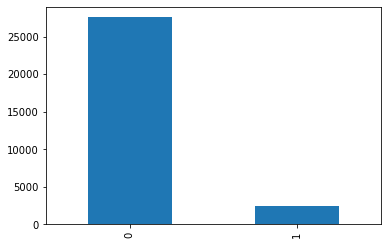

In [35]:
print(telecom_df_hv.churn.value_counts()*100/telecom_df_hv.shape[0])

telecom_df_hv.churn.value_counts().plot(kind='bar')
plt.show()

There is 8% of churn rate present in the data

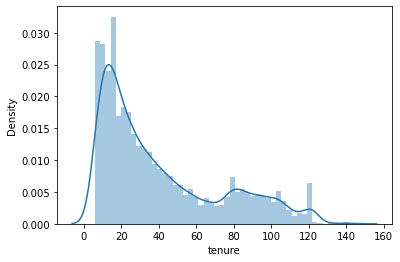

In [36]:
sns.distplot(telecom_df_hv['tenure'])
plt.show()

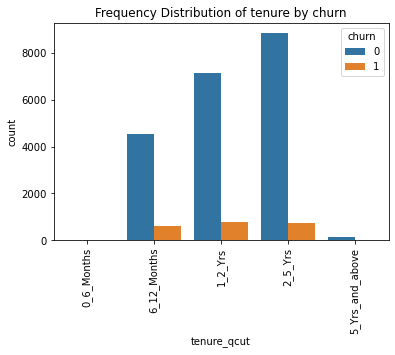

In [37]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0_6_Months', '6_12_Months', '1_2_Yrs', '2_5_Yrs', '5_Yrs_and_above']
telecom_df_hv['tenure_qcut'] = pd.cut(telecom_df_hv['tenure'],tn_range, labels=tn_label)


plt.title("Frequency Distribution of tenure by churn")
sns.countplot(x='tenure_qcut',data=telecom_df_hv,hue='churn')
plt.xticks(rotation=90)
plt.show()

churned customers are mostly having the tenure range of 6 months to 5 years

In [38]:
# create bar plot for 6th, 7th and 8th month
def plot_bar_chart(attribute):
    plt.figure(figsize=(15,10))
    df = telecom_df_hv
    plt.subplot(2,3,1)
    sns.barplot(data=df, y=attribute+"_6",x="churn",hue="churn",palette='rainbow')
    plt.subplot(2,3,2)
    sns.barplot(data=df, y=attribute+"_7",x="churn",hue="churn",palette='rainbow')
    plt.subplot(2,3,3)
    sns.barplot(data=df, y=attribute+"_8",x="churn",hue="churn",palette='rainbow')
    plt.show()

In [39]:
# create box plot for 6th, 7th and 8th month
def plot_box_chart(attribute1, attribute2, attribute3):
    plt.figure(figsize=(15,15))
    df = telecom_df_hv
    plt.subplot(3,3,1)
    plt.title(attribute1+"_6"+' vs churn')
    sns.boxplot(data=df, y=attribute1+"_6",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,2)
    plt.title(attribute1+"_7"+' vs churn')
    sns.boxplot(data=df, y=attribute1+"_7",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,3)
    plt.title(attribute1+"_8"+' vs churn')
    sns.boxplot(data=df, y=attribute1+"_8",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,4)
    plt.title(attribute2+"_6"+' vs churn')
    sns.boxplot(data=df, y=attribute2+"_6",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,5)
    plt.title(attribute2+"_7"+' vs churn')
    sns.boxplot(data=df, y=attribute2+"_7",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,6)
    plt.title(attribute2+"_8"+' vs churn')
    sns.boxplot(data=df, y=attribute2+"_8",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,7)
    plt.title(attribute3+"_6"+' vs churn')
    sns.boxplot(data=df, y=attribute3+"_6",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,8)
    plt.title(attribute3+"_7"+' vs churn')
    sns.boxplot(data=df, y=attribute3+"_7",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.subplot(3,3,9)
    plt.title(attribute3+"_8"+' vs churn')
    sns.boxplot(data=df, y=attribute3+"_8",x="churn",hue="churn",showfliers=False,palette=("plasma"))
    plt.show()

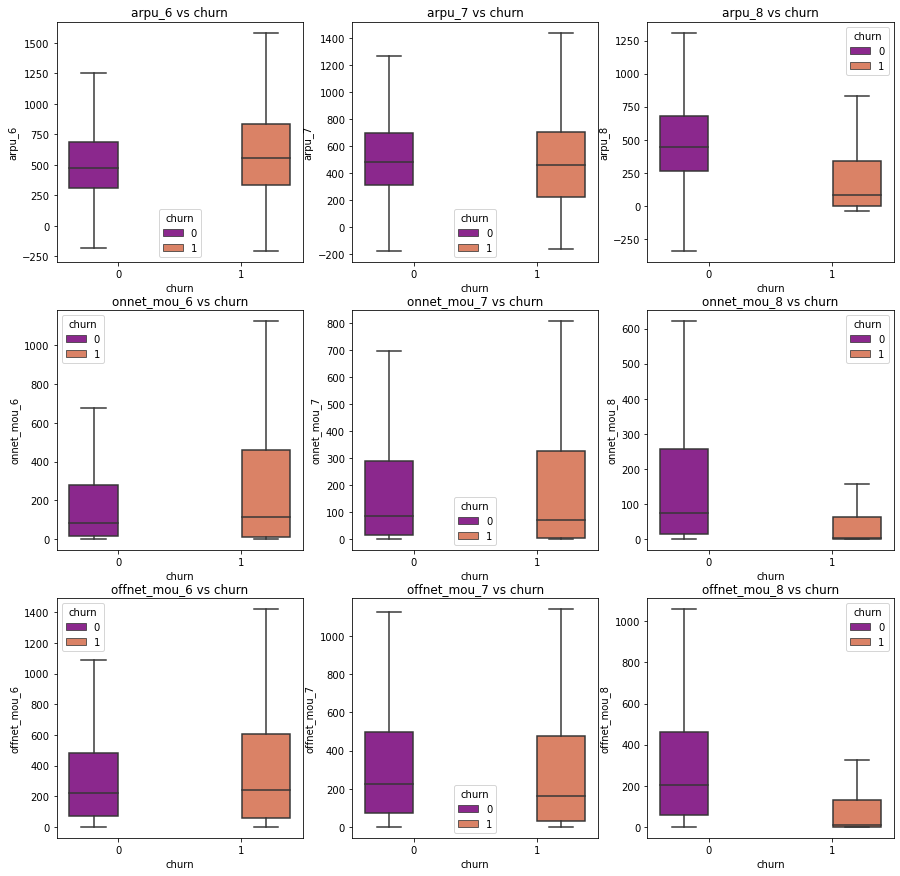

In [40]:
plot_box_chart('arpu', 'onnet_mou', 'offnet_mou')

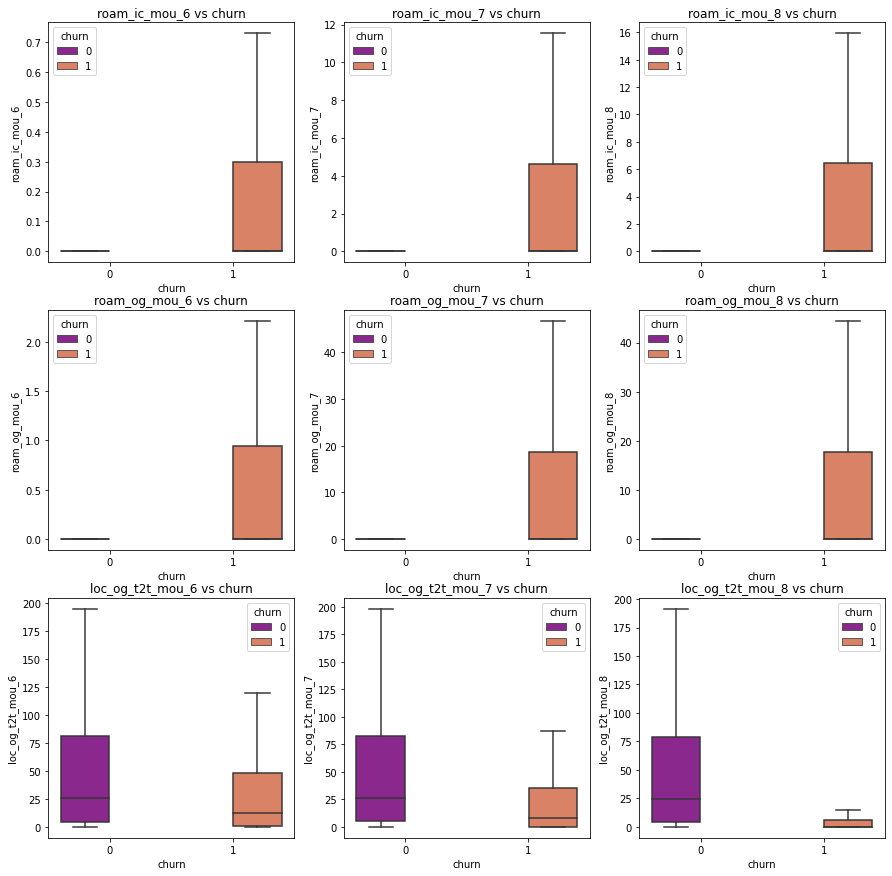

In [41]:
plot_box_chart('roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou')

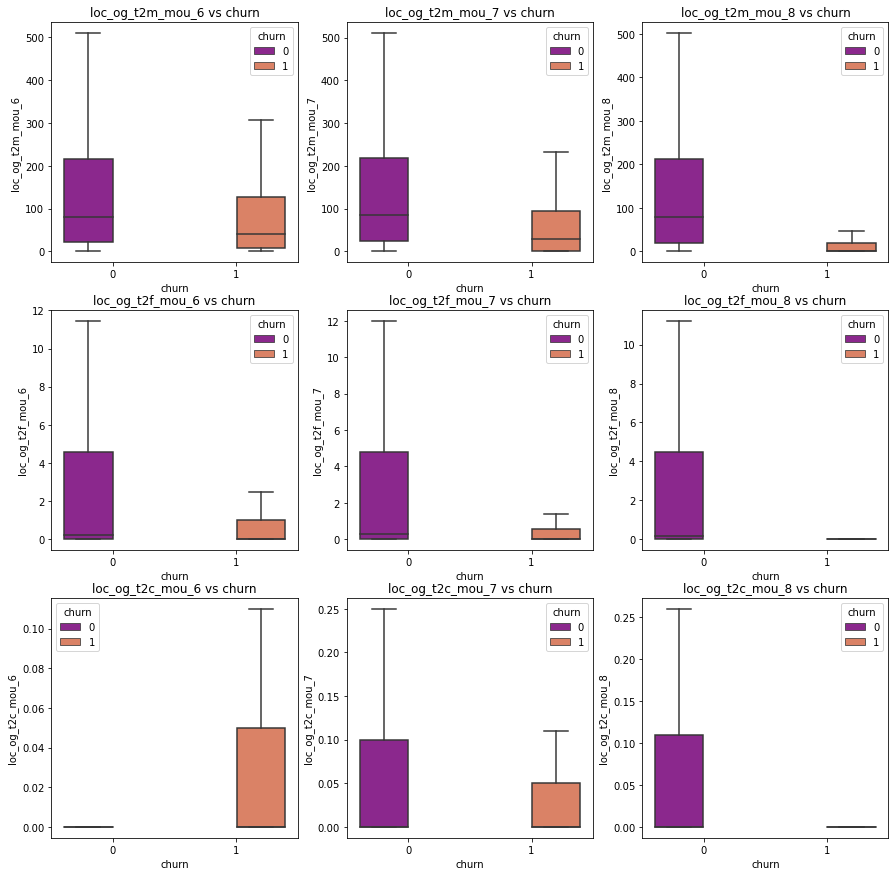

In [42]:
plot_box_chart('loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou')

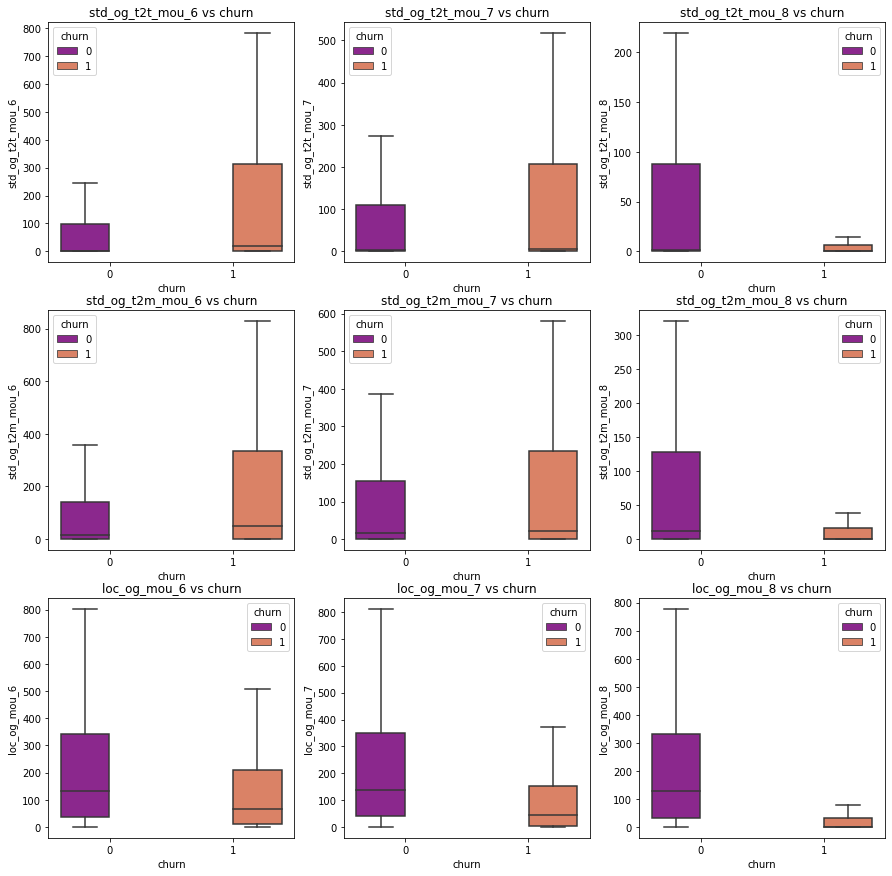

In [43]:
plot_box_chart('std_og_t2t_mou', 'std_og_t2m_mou', 'loc_og_mou')

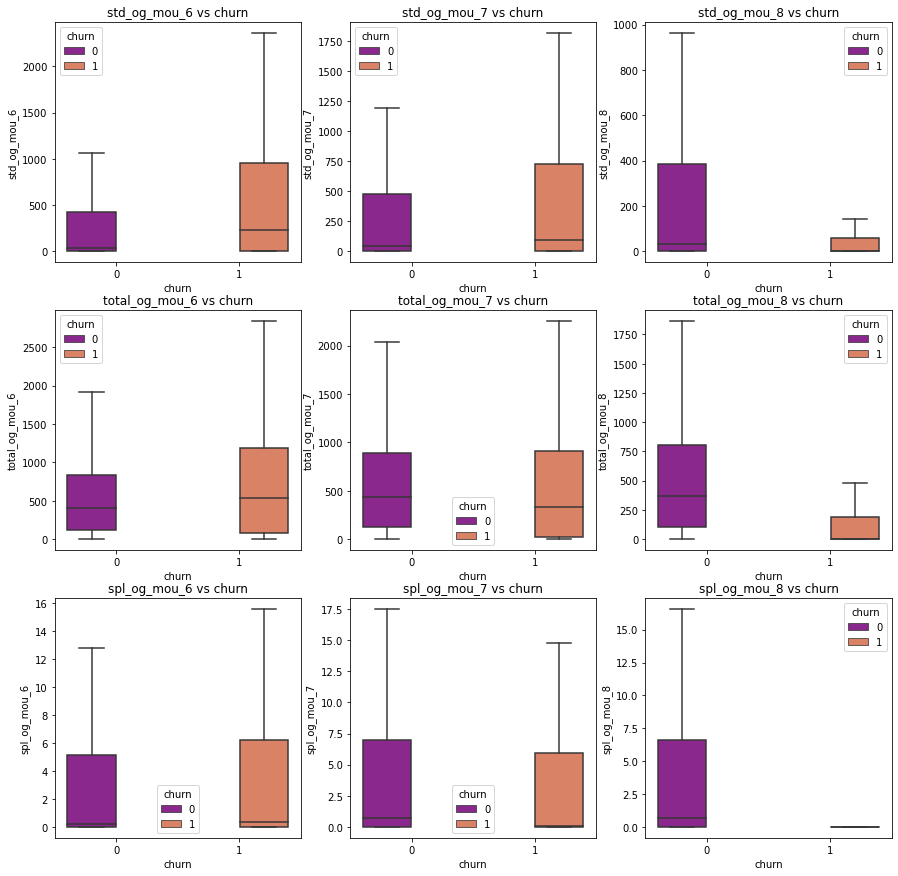

In [44]:
plot_box_chart('std_og_mou', 'total_og_mou', 'spl_og_mou')

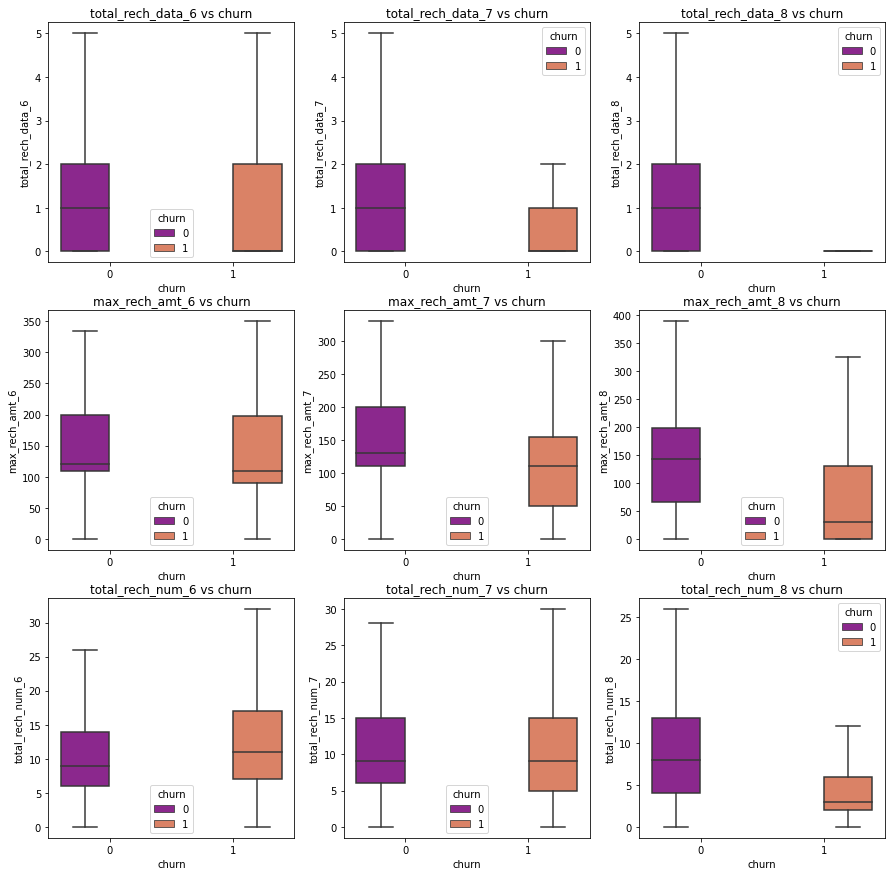

In [45]:
plot_box_chart('total_rech_data', 'max_rech_amt', 'total_rech_num')

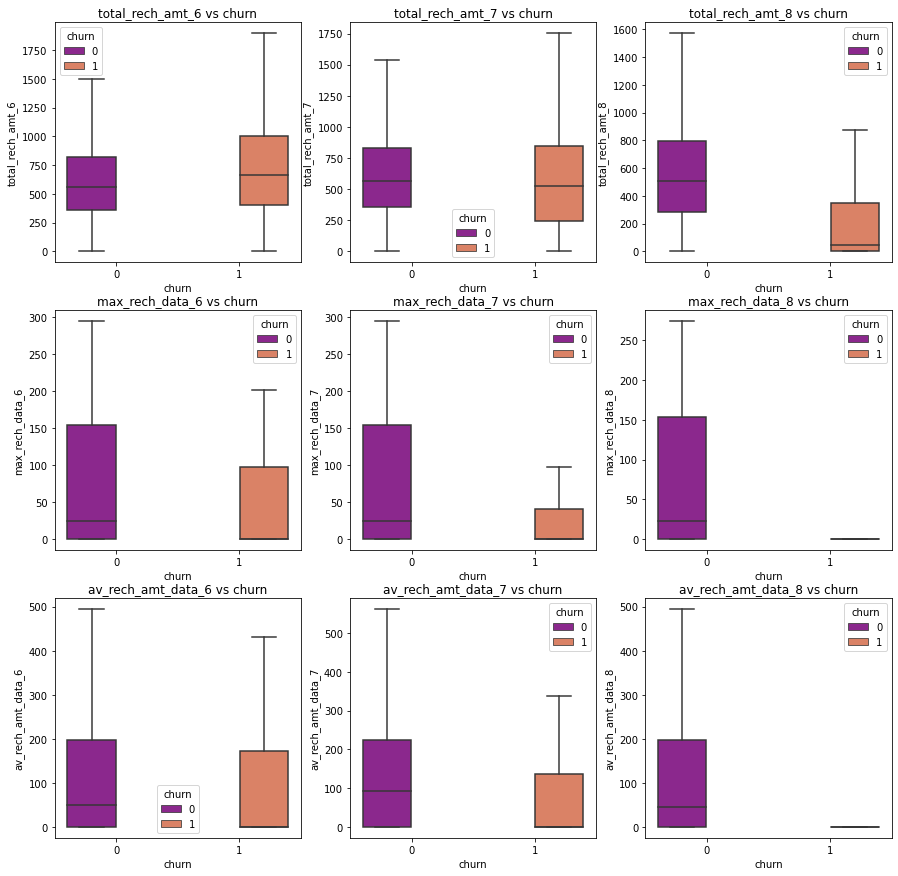

In [46]:
plot_box_chart('total_rech_amt', 'max_rech_data', 'av_rech_amt_data')

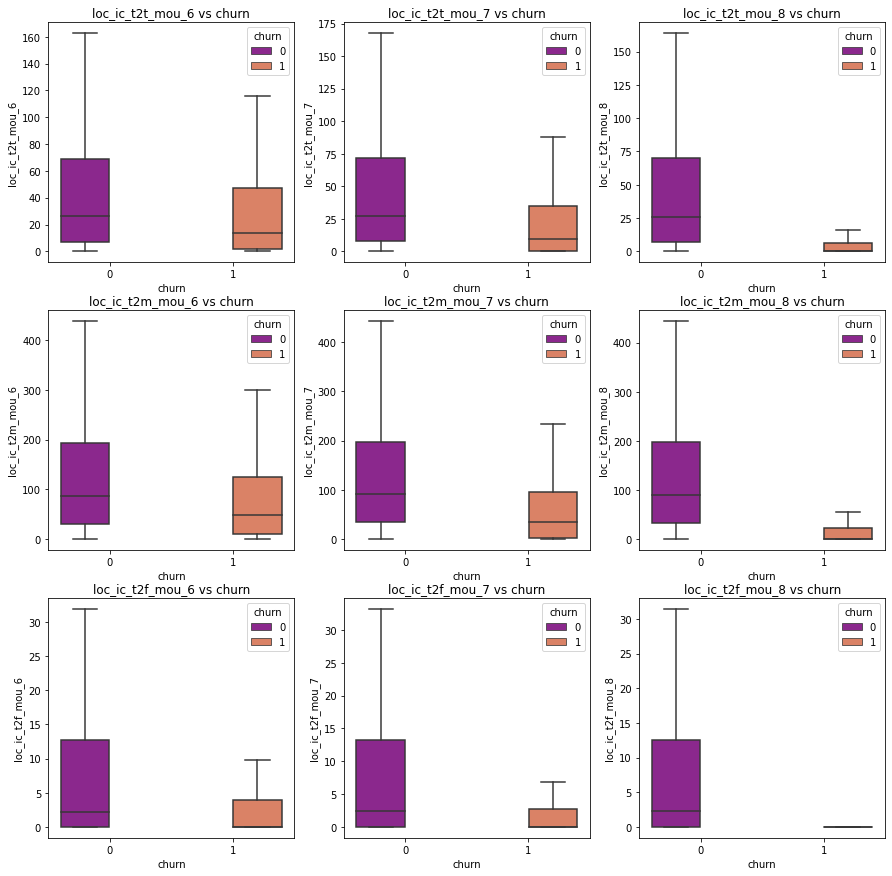

In [47]:
plot_box_chart('loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou')

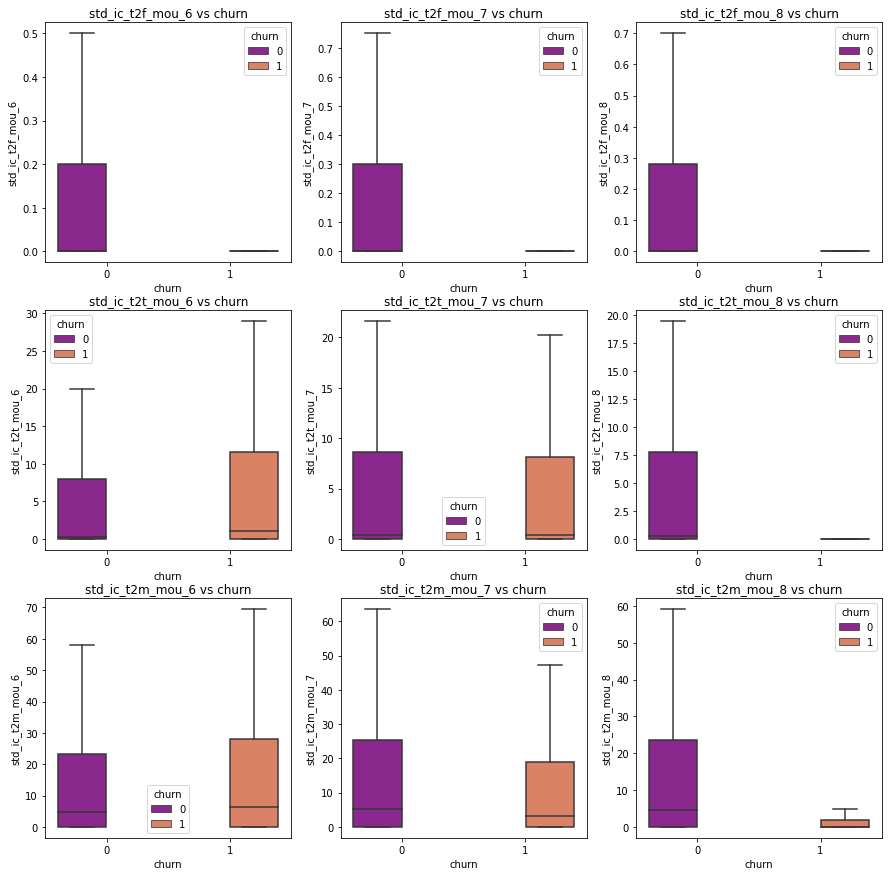

In [48]:
plot_box_chart('std_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou')

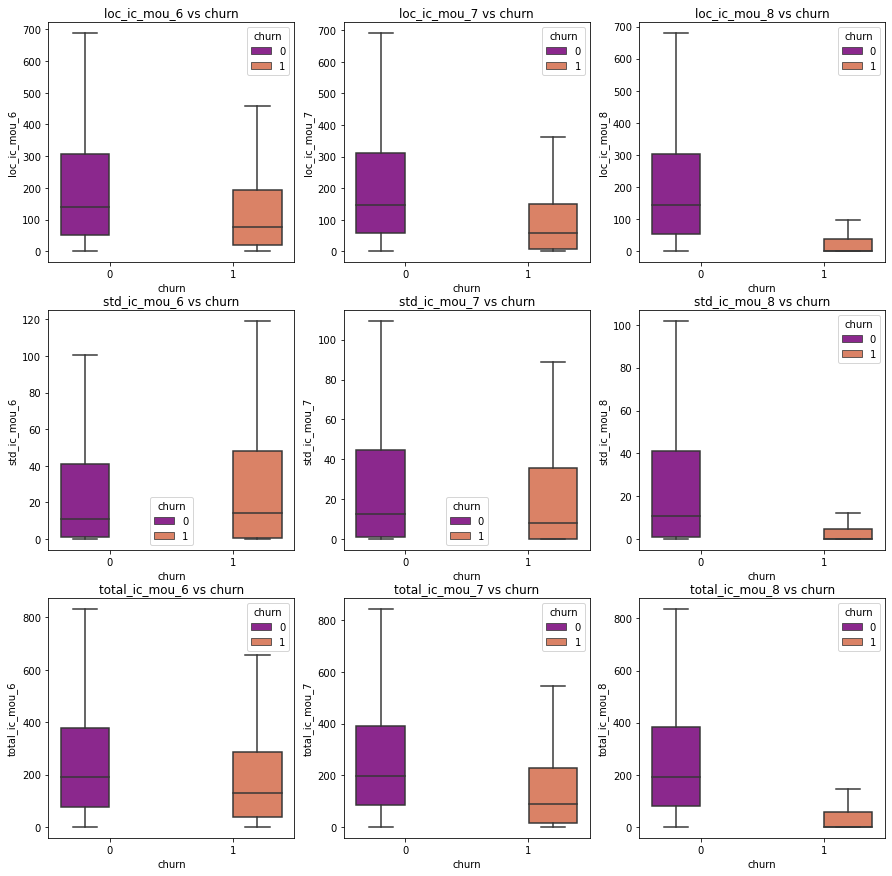

In [49]:
plot_box_chart('loc_ic_mou', 'std_ic_mou', 'total_ic_mou')

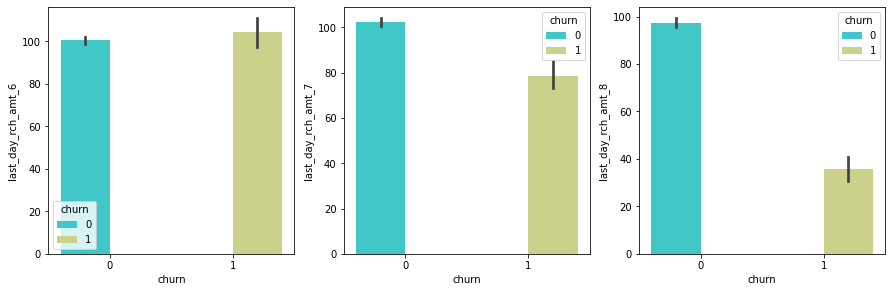

In [50]:
plot_bar_chart('last_day_rch_amt')

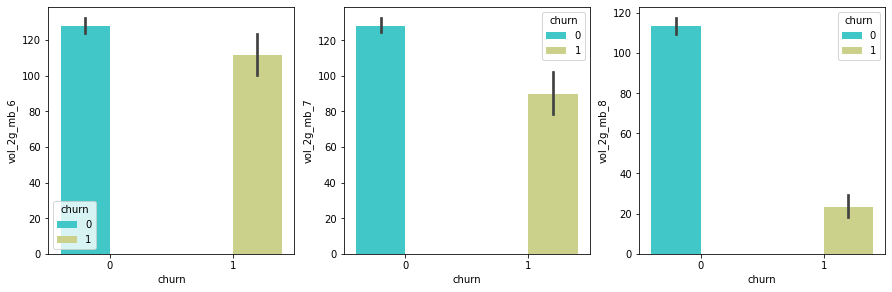

In [51]:
plot_bar_chart('vol_2g_mb')

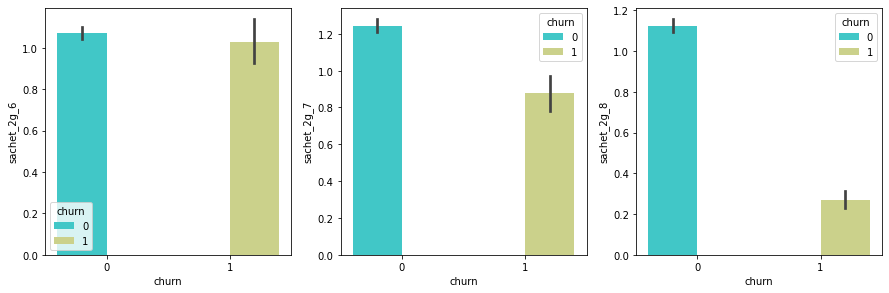

In [52]:
plot_bar_chart('sachet_2g')

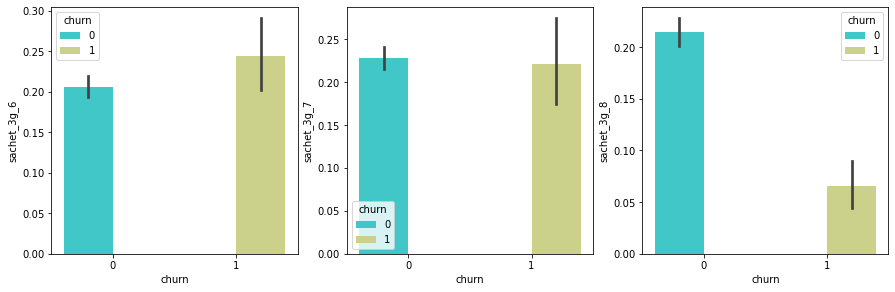

In [53]:
plot_bar_chart('sachet_3g')

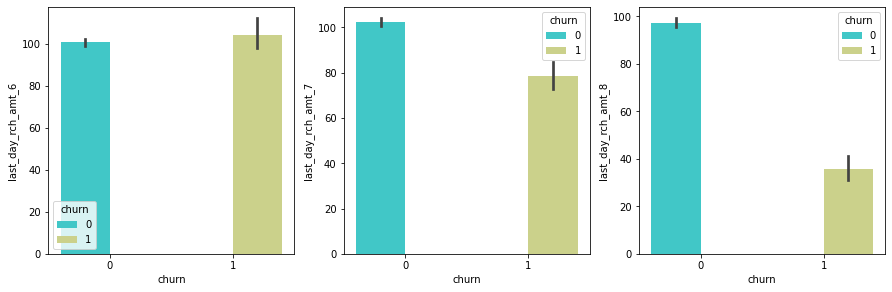

In [54]:
plot_bar_chart('last_day_rch_amt')

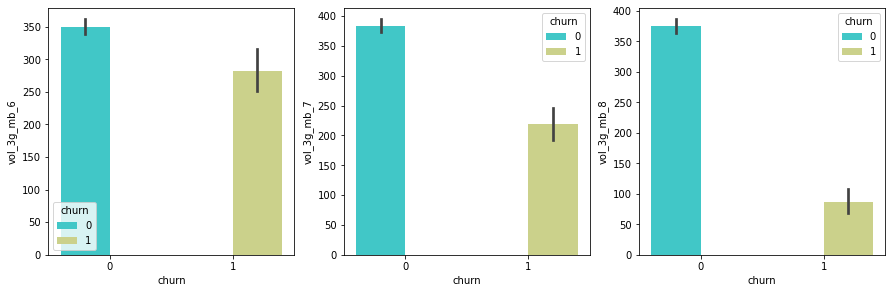

In [55]:
plot_bar_chart('vol_3g_mb')

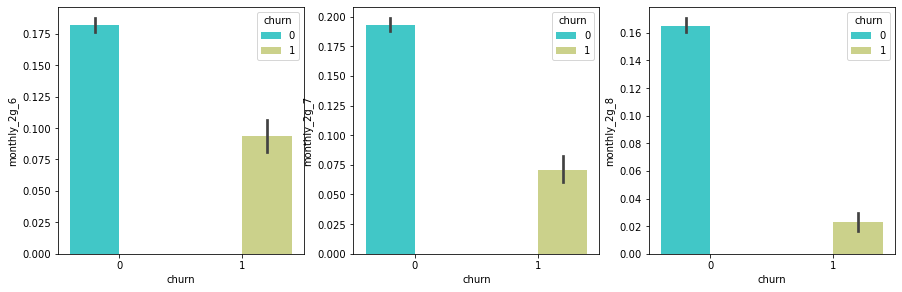

In [56]:
plot_bar_chart('monthly_2g')

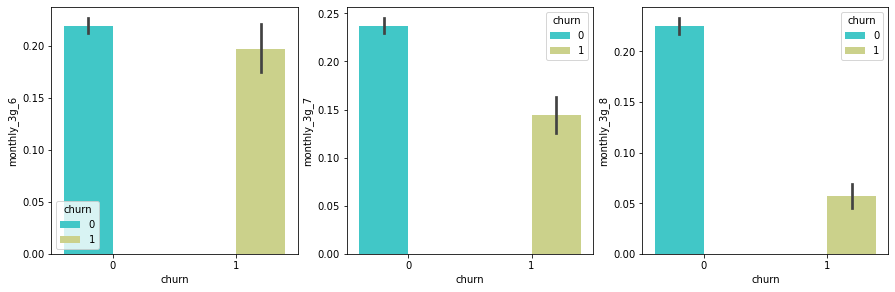

In [57]:
plot_bar_chart('monthly_3g')

We can observe the below points from above analysis

* There is a huge drop in average_revenue, onnet_minutes, offnet_minutes in 8th month(action phase) for churned customers.
* Incoming calls count also reduced in action phase for churned customers
* All the churned customers are in roaming zone.
* There is a reduction in local_og_t2t_minutes in 8th month for churned customers.
* There is a significant reduction in 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou' from 6 to 7th month and 7 to 8th month for churned customers.
* There is a drop in 'std_og_t2t_mou', 'std_og_t2m_mou', 'loc_og_mou','std_og_mou', 'total_og_mou', 'spl_og_mou'  in 8th month for churned customers.
* All kinds of reachrges have also been reduced from 6 to 7th month and 7 to 8th month for churned customers.
* All the data related variables also have a drop in action phase for churned customers

In [58]:
# Current dimension of the dataset
telecom_df_hv.shape

(30001, 135)

### Model Building and Evaluation

In [59]:
telecom_df_hv.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 135 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2

In [60]:
# # Creating a dummy variable for categorical variables and dropping the first one.
# dummy = pd.get_dummies(telecom_df_hv['tenure_qcut'], drop_first=True)
# print(dummy.head())

# # Adding the results to the master dataframe
# telecom_df_hv = pd.concat([telecom_df_hv, dummy], axis=1)
# telecom_df_hv.head()

# # dropping tenure columns
# telecom_df_hv.drop(['tenure', 'tenure_qcut'], axis=1, inplace=True)

telecom_df_hv.drop(['tenure_qcut'], axis=1, inplace=True)

In [61]:
# splitting test and train data
from sklearn.model_selection import train_test_split
y = telecom_df_hv.pop('churn')
X = telecom_df_hv
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Scaling the features before modelling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)

# transform test using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling class imbalance using smote

In [62]:
from imblearn.over_sampling import SMOTE

print("Dimension of X_train Shape before SMOTE: ", X_train.shape)
print("Dimension of y_train Shape before SMOTE: ", y_train.shape)

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape: ", X_train_sm.shape)
print("Dimension of y_train_sm Shape: ", y_train_sm.shape)

Dimension of X_train Shape before SMOTE:  (21000, 133)
Dimension of y_train Shape before SMOTE:  (21000,)
Dimension of X_train_sm Shape:  (38618, 133)
Dimension of y_train_sm Shape:  (38618,)


### PCA

In [103]:
## Improting the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

## Doing the PCA on the train data
pca.fit(X_train_sm)

pca.components_

array([[ 5.31620009e-03,  1.73549603e-03, -8.12759066e-03, ...,
        -3.29967400e-02, -2.25607741e-02, -8.94816662e-01],
       [ 3.43670180e-02,  2.78911681e-02,  1.99996375e-02, ...,
        -5.64213314e-02, -4.49530130e-02,  3.27592690e-01],
       [ 2.78315907e-02,  3.14848012e-02,  3.99137563e-02, ...,
         9.96458375e-02,  6.41590320e-02, -2.48695235e-01],
       ...,
       [-1.93249439e-15, -6.33683964e-17,  2.38962341e-16, ...,
         6.07010399e-17,  8.12192875e-17,  5.36712204e-17],
       [-8.67696892e-16, -1.64839578e-16, -1.53277812e-16, ...,
        -1.00763782e-17, -7.20828158e-17,  7.35381672e-18],
       [-0.00000000e+00, -5.48223728e-16,  2.49499235e-16, ...,
        -8.39578584e-17, -3.03576147e-17,  1.47593495e-17]])

In [104]:
pca.explained_variance_ratio_[:50]

array([0.20004202, 0.14865352, 0.07875485, 0.06574479, 0.05307274,
       0.04811837, 0.04803445, 0.03131431, 0.02271189, 0.02216153,
       0.02025049, 0.01940021, 0.01345064, 0.01264223, 0.01247642,
       0.01110215, 0.01093528, 0.01011896, 0.00966545, 0.00958172,
       0.00897466, 0.00765168, 0.00730313, 0.00673259, 0.0065174 ,
       0.00641386, 0.00600389, 0.00546767, 0.00530887, 0.00473403,
       0.00449129, 0.00427967, 0.00415594, 0.00357349, 0.00340822,
       0.00312664, 0.00302445, 0.00277945, 0.00265177, 0.00255102,
       0.00247692, 0.00227715, 0.00217904, 0.00214014, 0.00192908,
       0.00185889, 0.0017871 , 0.00167227, 0.00164503, 0.00159201])

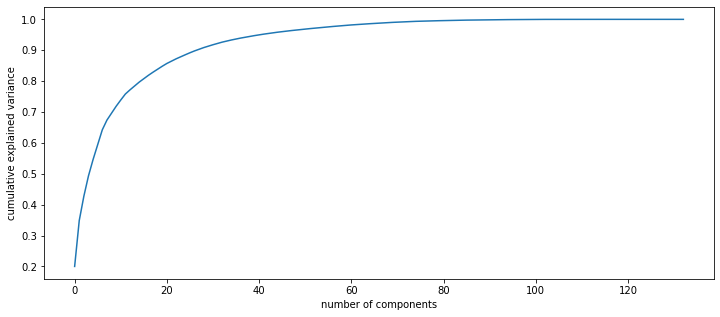

In [105]:
# screeplot between cumulative variance and number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [66]:
# incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=60)

#fit
X_train_pca = pca.fit_transform(X_train_sm)
X_train_pca.shape

(38618, 60)

In [67]:
#Applying selected components to the test data

X_test_pca = pca.transform(X_test)

X_test_pca.shape

(9001, 60)

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train_pca, y_train_sm)

#Predict on training set
train_predictions = lr.predict(X_train_pca)
train_predprob = lr.predict_proba(X_train_pca)[:,1]
print("Train metrics:")
print ("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_sm, train_predictions)))
print ("Recall/Sensitivity :"+"{:2.2}".format(metrics.recall_score(y_train_sm, train_predictions)))
print ("AUC Score :"+"{:2.2}".format(metrics.roc_auc_score(y_train_sm, train_predprob)))

#Making prediction on the test data
test_predictions = lr.predict(X_test_pca)

print("")
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test,test_predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test,test_predictions)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test, test_predictions)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test, test_predictions)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))


Train metrics:
Accuracy :0.84
Recall/Sensitivity :0.86
AUC Score :0.91

Test metrics: 
[[6827 1424]
 [ 134  616]]
Accuracy :0.83
AUC score : 0.82
Precision score : 0.3
Sensitivity/Recall :0.82
Specificity:0.83
False Positive Rate:0.17
Positive predictive value:0.3
Negative Predictive value:0.98


In [69]:
#lets check with probability cutoff 0.5
y_train_pred = lr.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.461754,0
1,0,0.107176,0
2,0,0.231135,0
3,0,0.000424,0
4,0,0.064596,0


In [70]:
# Plotting the ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

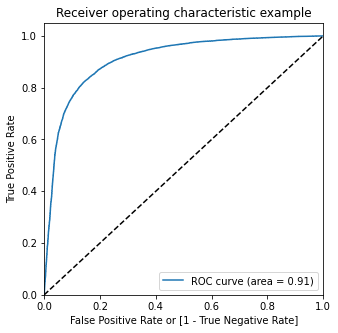

In [72]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.461754,0,1,1,1,1,1,0,0,0,0,0
1,0,0.107176,0,1,1,0,0,0,0,0,0,0,0
2,0,0.231135,0,1,1,1,0,0,0,0,0,0,0
3,0,0.000424,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064596,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.689135  0.980734  0.397535
0.2  0.2   0.758066  0.961987  0.554146
0.3  0.3   0.799342  0.936455  0.662230
0.4  0.4   0.826376  0.906210  0.746543
0.5  0.5   0.837174  0.860790  0.813558
0.6  0.6   0.837977  0.800818  0.875136
0.7  0.7   0.821715  0.725206  0.918225
0.8  0.8   0.775623  0.598218  0.953027
0.9  0.9   0.600782  0.215236  0.986328


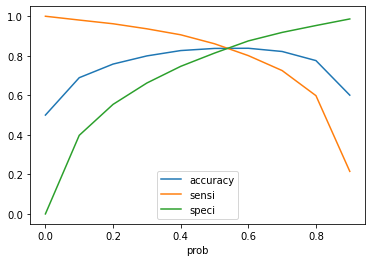

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Previously we selected 0.5 as the optimum point to take the cutoff probability

To understand the point more clearly we take points between 0.5 to 0.6 and evaluate the results

In [76]:
# Let's create columns with different probability cutoffs 
numbers = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.461754,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.107176,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.231135,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.000424,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.064596,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.837174  0.860790  0.813558
0.51  0.51  0.836941  0.854783  0.819100
0.52  0.52  0.838055  0.849500  0.826609
0.53  0.53  0.838443  0.844166  0.832720
0.54  0.54  0.838858  0.838366  0.839350
0.55  0.55  0.839116  0.832669  0.845564
0.56  0.56  0.839764  0.826817  0.852711
0.57  0.57  0.839997  0.820809  0.859185
0.58  0.58  0.839272  0.813973  0.864571
0.59  0.59  0.838573  0.807344  0.869802


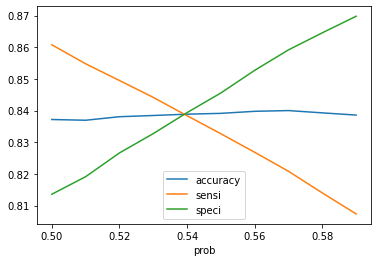

In [78]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### We can observe that 0.54 is the optimum point to take the cutoff probability

In [79]:
# apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_predicted
0,0,0.461754,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.107176,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.231135,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.000424,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.064596,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = lr.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.461754,0
1,0,0.107176,0
2,0,0.231135,0
3,0,0.000424,0
4,0,0.064596,0


In [81]:
print("Train metrics: ")

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))


Train metrics: 
[[16207  3102]
 [ 3121 16188]]
Accuracy :0.84
AUC score : 0.84
Precision score : 0.84
Sensitivity/Recall :0.84
Specificity:0.84
False Positive Rate:0.16
Positive predictive value:0.84
Negative Predictive value:0.84


In [82]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = lr.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
20296,1,0.696625,1
8279,1,0.492904,0
72269,0,0.071784,0
65602,0,0.293755,0
42758,1,0.812303,1


In [83]:
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))


Test metrics: 
[[7025 1226]
 [ 153  597]]
Accuracy :0.85
AUC score : 0.82
Precision score : 0.33
Sensitivity/Recall :0.8
Specificity:0.85
False Positive Rate:0.15
Positive predictive value:0.33
Negative Predictive value:0.98


### Random Forest

#### Building model without hyperparamenters tuning

In [84]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train_pca,y_train_sm)


#Predict on training set
train_predictions = rfc.predict(X_train_pca)
train_predprob = rfc.predict_proba(X_train_pca)[:,1]
print("Train metrics:")
print ("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_sm, train_predictions)))
print ("Recall/Sensitivity :"+"{:2.2}".format(metrics.recall_score(y_train_sm, train_predictions)))
print ("AUC Score :"+"{:2.2}".format(metrics.roc_auc_score(y_train_sm, train_predprob)))

#Making prediction on the test data
test_predictions = rfc.predict(X_test_pca)

print("")
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test,test_predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test,test_predictions)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test, test_predictions)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test, test_predictions)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))


Train metrics:
Accuracy :1.0
Recall/Sensitivity :1.0
AUC Score :1.0

Test metrics: 
[[7853  398]
 [ 383  367]]
Accuracy :0.91
AUC score : 0.72
Precision score : 0.48
Sensitivity/Recall :0.49
Specificity:0.95
False Positive Rate:0.048
Positive predictive value:0.48
Negative Predictive value:0.95


#### Hyperparameters tuning

In [85]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold

# define function for grid search
def hyper_tuning(parameters, X_train, y_train, n_folds=5):
    # instantiate the model
    rf = RandomForestClassifier()

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                        cv=n_folds, 
                       scoring="accuracy",
                     return_train_score=True)
    rf.fit(X_train, y_train)
    
    # scores of GridSearch CV
    scores = rf.cv_results_
#     print(pd.DataFrame(scores).head())
    
    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(10,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show() 

#### Tuning max depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

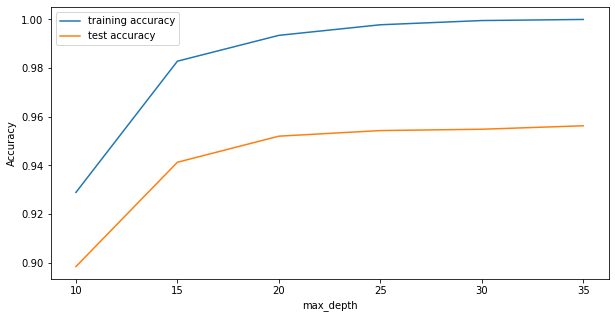

In [86]:
# parameters to build the model on
parameters = {'max_depth': range(10, 40, 5)}
hyper_tuning(parameters,X_train_pca,y_train_sm)

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score become constant. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest. So we can take 20 as max depth for final model.

#### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy.

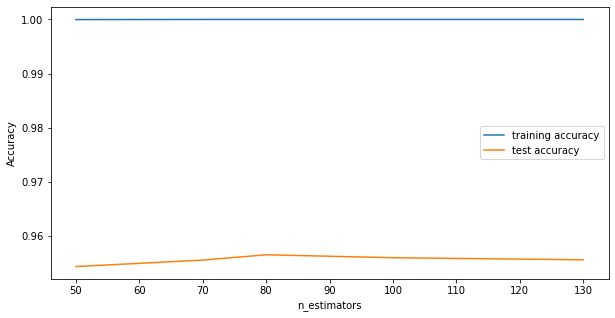

In [87]:
# parameters to build the model on
parameters = {'n_estimators': [50, 70, 80, 100, 130]}
hyper_tuning(parameters,X_train_pca,y_train_sm)

We can take n_estimators as 70

#### Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

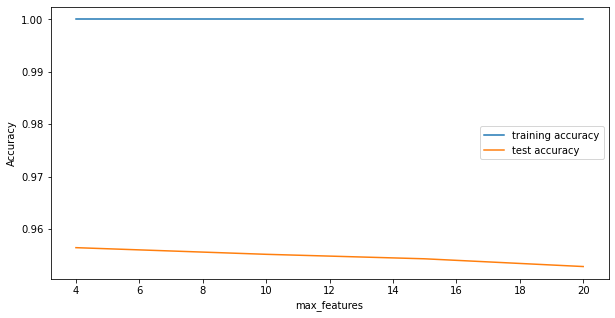

In [88]:
# parameters to build the model on
parameters = {'max_features': [4, 10, 15, 20]}
hyper_tuning(parameters,X_train_pca,y_train_sm)

We can take max_features as 6

#### Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

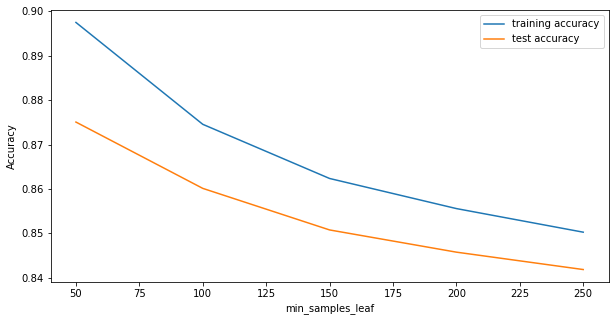

In [89]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 300, 50)}
hyper_tuning(parameters,X_train_pca,y_train_sm)

We can consider min_samples_leaf as 100

#### Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split.

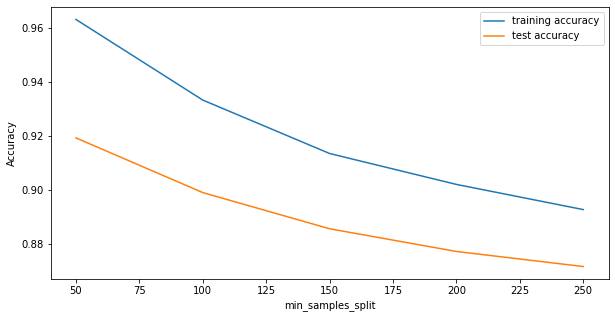

In [90]:
# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}
hyper_tuning(parameters,X_train_pca,y_train_sm)

We can consider min_samples_split as 100

#### Building final Random forest model with the selected hyperparameters

In [101]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=6,
                             n_estimators=70,
                             random_state=10)

# fit
rf=rfc.fit(X_train_pca,y_train_sm)

#Predict on training set
train_predictions = rf.predict(X_train_pca)
train_predprob = rf.predict_proba(X_train_pca)[:,1]
print("Train metrics:")
print ("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_sm, train_predictions)))
print ("Recall/Sensitivity :"+"{:2.2}".format(metrics.recall_score(y_train_sm, train_predictions)))
print ("AUC Score :"+"{:2.2}".format(metrics.roc_auc_score(y_train_sm, train_predprob)))

#Making prediction on the test data
test_predictions = rf.predict(X_test_pca)

print("")
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test,test_predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test,test_predictions)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test, test_predictions)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test, test_predictions)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))


Train metrics:
Accuracy :0.88
Recall/Sensitivity :0.87
AUC Score :0.95

Test metrics: 
[[7248 1003]
 [ 199  551]]
Accuracy :0.87
AUC score : 0.81
Precision score : 0.35
Sensitivity/Recall :0.73
Specificity:0.88
False Positive Rate:0.12
Positive predictive value:0.35
Negative Predictive value:0.97


### XGBoost

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model on training data with default hyperparameters
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
#Predict on training set
train_predictions = model.predict(X_train_pca)
train_predprob = model.predict_proba(X_train_pca)[:,1]
print("Train metrics:")
print ("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_sm, train_predictions)))
print ("Recall/Sensitivity :"+"{:2.2}".format(metrics.recall_score(y_train_sm, train_predictions)))
print ("AUC Score :"+"{:2.2}".format(metrics.roc_auc_score(y_train_sm, train_predprob)))

#Making prediction on the test data
test_predictions = model.predict(X_test_pca)

print("")
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test,test_predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test,test_predictions)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test, test_predictions)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test, test_predictions)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))

Train metrics:
Accuracy :0.99
Recall/Sensitivity :1.0
AUC Score :1.0

Test metrics: 
[[7695  556]
 [ 291  459]]
Accuracy :0.91
AUC score : 0.77
Precision score : 0.45
Sensitivity/Recall :0.61
Specificity:0.93
False Positive Rate:0.067
Positive predictive value:0.45
Negative Predictive value:0.96


In [94]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=70, eval_metric='mlogloss')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True,)  

# fit the model
model_cv.fit(X_train_pca, y_train_sm)       

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monoto...ts=None,
                                     n_estimators=70, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                      

In [95]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.8559737091779563
{'learning_rate': 0.3, 'subsample': 0.3}


In [96]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':70,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(eval_metric='mlogloss', learning_rate= 0.3,
          max_depth= 2, 
          n_estimators=70,
          subsample=0.3,
         objective='binary:logistic')
model.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
#Predict on training set
train_predictions = model.predict(X_train_pca)
train_predprob = model.predict_proba(X_train_pca)[:,1]
print("Train metrics:")
print ("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_train_sm, train_predictions)))
print ("Recall/Sensitivity :"+"{:2.2}".format(metrics.recall_score(y_train_sm, train_predictions)))
print ("AUC Score :"+"{:2.2}".format(metrics.roc_auc_score(y_train_sm, train_predprob)))

#Making prediction on the test data
test_predictions = model.predict(X_test_pca)

print("")
print("Test metrics: ")

confusion = metrics.confusion_matrix(y_test,test_predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy :"+"{:2.2}".format(metrics.accuracy_score(y_test,test_predictions)))
print("AUC score : "+"{:2.2}".format(metrics.roc_auc_score(y_test, test_predictions)))
print("Precision score : "+"{:2.2}".format(metrics.precision_score(y_test, test_predictions)))
print('Sensitivity/Recall :'+"{:2.2}".format(TP / float(TP+FN)))
print('Specificity:'+"{:2.2}".format(TN / float(TN+FP)))
print('False Positive Rate:'+"{:2.2}".format(FP/ float(TN+FP)))
print('Positive predictive value:'+"{:2.2}".format(TP / float(TP+FP)))
print('Negative Predictive value:'+"{:2.2}".format(TN / float(TN+ FN)))

Train metrics:
Accuracy :0.86
Recall/Sensitivity :0.88
AUC Score :0.93

Test metrics: 
[[6986 1265]
 [ 166  584]]
Accuracy :0.84
AUC score : 0.81
Precision score : 0.32
Sensitivity/Recall :0.78
Specificity:0.85
False Positive Rate:0.15
Positive predictive value:0.32
Negative Predictive value:0.98


#### Logistic Regression metrics:

Train metrics: 
Accuracy :0.84, 
AUC score : 0.84, 
Sensitivity/Recall :0.84


Test metrics: 
Accuracy :0.85, 
AUC score : 0.82, 
Precision score : 0.33, 
Sensitivity/Recall :0.8, 
Specificity:0.85, 
False Positive Rate:0.15, 
Positive predictive value:0.33, 
Negative Predictive value:0.98


#### Random Forest metrics:

Train metrics:
Accuracy :0.88, 
Recall/Sensitivity :0.87, 
AUC Score :0.95 

Test metrics: 
Accuracy :0.87, 
AUC score : 0.81, 
Precision score : 0.35, 
Sensitivity/Recall :0.73, 
Specificity:0.88, 
False Positive Rate:0.12, 
Positive predictive value:0.35, 
Negative Predictive value:0.97 


#### XGBoost metrics:

Train metrics:
Accuracy :0.86, 
Recall/Sensitivity :0.88, 
AUC Score :0.93

Test metrics: 
Accuracy :0.84, 
AUC score : 0.81, 
Precision score : 0.32, 
Sensitivity/Recall :0.78, 
Specificity:0.85, 
False Positive Rate:0.15, 
Positive predictive value:0.32, 
Negative Predictive value:0.98


* Recall/Sensitivity score needs to be considered in this case study as Telecom company will not like any high value customer to churn so will try to find out all high value customers who may leave in future. Company may willing to even bear burden of few customers who may not churn but will be classified as churn. So overall recall score will be considered for good model. Logistics Regression will be chosen in this case.


* As we can see that Train Recall score of XGBoost and Random forest is better than Logistics Regression but Test Recall score of Logistics Regression is better when compared to both. Difference in between Train and test score is less for Logistics Regression which seems model is more stable.

### Important features

In [115]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=6,
                             n_estimators=70)

In [116]:
# fit
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=70)

#### Top 30 features

In [124]:
# predictors
features = X.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance.head(30)

Sum of importance= 100.0


,variables,importance_percentage
0,total_rech_amt_8,6.922932
1,loc_og_mou_8,6.333253
2,total_ic_mou_8,5.809748
3,loc_ic_mou_8,5.286624
4,roam_og_mou_8,4.992156
5,roam_ic_mou_8,4.769328
6,arpu_8,4.071910
7,last_day_rch_amt_8,3.970476
8,loc_og_t2m_mou_8,3.803261
9,av_rech_amt_data_8,3.584873


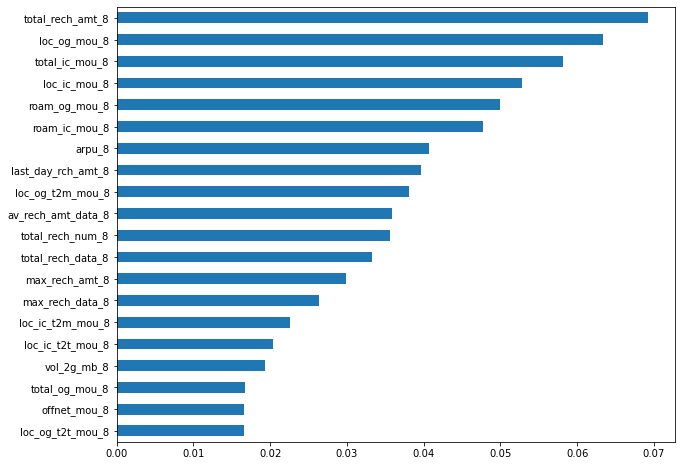

In [126]:
plt.figure(figsize=(10,8))
features = pd.Series(rfc.feature_importances_, index=X.columns)
features.nlargest((20)).sort_values().plot(kind='barh', align='center')
plt.show()

### Recommendations:

* We could see from above list that almost all the features of top 30 most important features are from action phase that is August month. Hence we need to focus on these features to identify high value customers who may churn in future.

* Recharge amount is a major factor which influences the churn rate. So giving some offers to the customers whose recharge amount is getting reduced might help in retaining the customer.

* Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current netwrok for few days.

* Roaming is a strong indicator for customer churning. Providing some roaming offers are reducing the roaming charges might help not to churn.

* Customers with less than 5 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schemes to that group.

* Providing some data recharge offers and providing a good bandwidth for internet is a way to reduce the churned customers.